# **Imports**

In [1]:
import os
os.chdir("../..")
os.chdir(r"src")

from Axes.curves_plots import *

os.chdir("../")

# **Parameters**

In [15]:
axis = 1
sources = ['GUA', 'TE', 'DM']
focus_on_companies = None
curves_by_company = None
with_parliament = False

# **Plots**

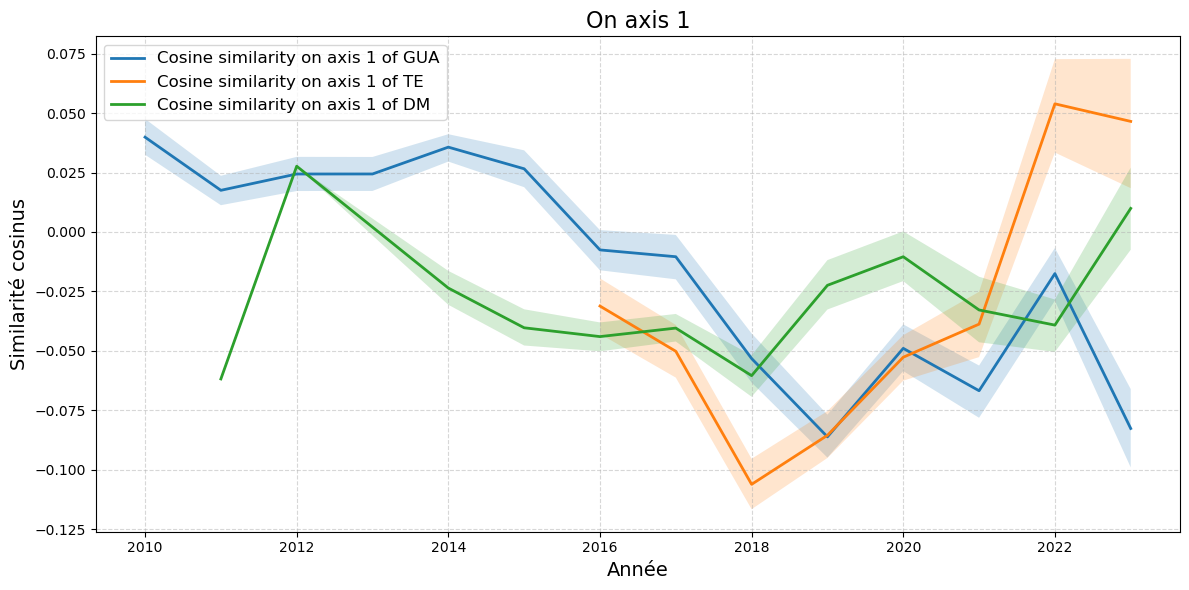

In [16]:
choose_projection_cos(axis, sources, focus_on_companies, curves_by_company, with_parliament)